In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("KNNAlgorithmDataset.csv")
df = pd.DataFrame(data=data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=df.columns[[0, -1]], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
270,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,...,10.76,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
47,M,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
120,B,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,...,12.82,15.97,83.74,510.5,0.15480,0.23900,0.21020,0.08958,0.3016,0.08523
113,B,10.510,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,...,11.16,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
437,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
22,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,...,18.07,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
293,B,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,0.1875,...,13.06,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
443,B,10.570,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
520,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,10.57,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982


In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 31)

In [7]:
df["diagnosis"] = df["diagnosis"].replace({"M": 0, "B": 1}).infer_objects(copy=False)
df.sample(10)

/tmp/ipykernel_14831/409561782.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"] = df["diagnosis"].replace({"M": 0, "B": 1}).infer_objects(copy=False)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
353,0,15.08,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,0.1647,...,18.51,33.22,121.20,1050.0,0.16600,0.2356,0.40290,0.15260,0.2654,0.09438
136,1,11.71,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,0.1339,...,13.33,25.48,86.16,546.7,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343
290,1,14.41,19.73,96.03,651.0,0.08757,0.16760,0.136200,0.066020,0.1714,...,15.77,22.13,101.70,767.3,0.09983,0.2472,0.22200,0.10210,0.2272,0.08799
24,0,16.65,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.091700,0.1995,...,26.46,31.56,177.00,2215.0,0.18050,0.3578,0.46950,0.20950,0.3613,0.09564
75,0,16.07,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.066380,0.1798,...,19.77,24.56,128.80,1223.0,0.15000,0.2045,0.28290,0.15200,0.2650,0.06387
126,0,13.61,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,0.1761,...,16.89,35.64,113.20,848.7,0.14710,0.2884,0.37960,0.13290,0.3470,0.07900
352,0,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.191300,0.1956,...,33.13,23.58,229.30,3234.0,0.15300,0.5937,0.64510,0.27560,0.3690,0.08815
533,0,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.152300,0.101500,0.2166,...,23.23,27.15,152.00,1645.0,0.10970,0.2534,0.30920,0.16130,0.3220,0.06386
306,1,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
436,1,12.87,19.54,82.67,509.2,0.09136,0.07883,0.017970,0.020900,0.1861,...,14.45,24.38,95.14,626.9,0.12140,0.1652,0.07127,0.06384,0.3313,0.07735


In [8]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]
X.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
93,13.450,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,15.10,25.94,97.59,699.4,0.13390,0.17510,0.13810,0.07911,0.2678,0.06603
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
520,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,...,10.57,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969


In [9]:
y.sample(5)

490    1
6      0
338    1
446    0
165    1
Name: diagnosis, dtype: int64

In [10]:
train_split = int(0.95 * len(df))
X_train, X_val = X[:train_split], X[train_split:]
y_train, y_val = y[:train_split], y[train_split:]

X_train.shape, X_val.shape

((540, 30), (29, 30))

Optimal K: 1 with Minimum Error Rate: 0.0000


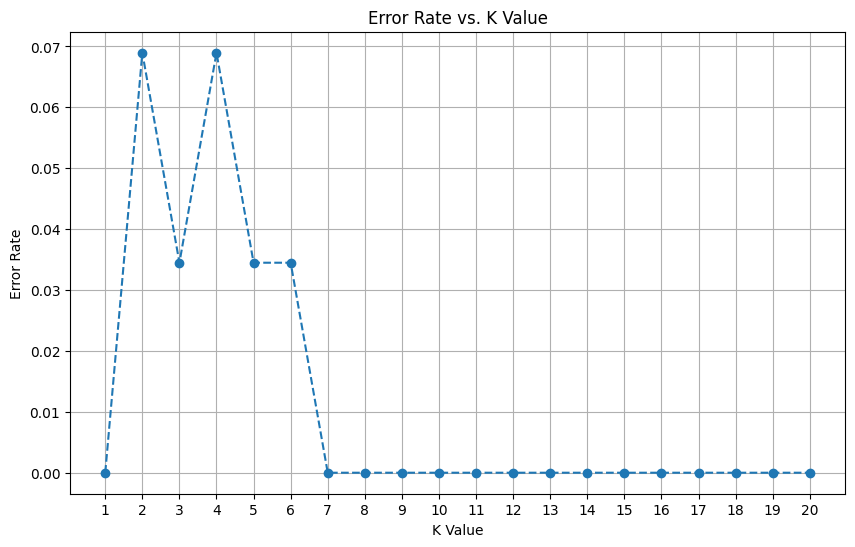

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

error_rates = []
k_values = range(1, 21) # Test k from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    error_rates.append(1 - accuracy_score(y_val, y_pred))

min_error = min(error_rates)
optimal_k = k_values[error_rates.index(min_error)]
print(f"Optimal K: {optimal_k} with Minimum Error Rate: {min_error:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [12]:
knn_euclidean = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn_manhattan = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
knn_cosine = KNeighborsClassifier(n_neighbors=7, metric="cosine")

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_cosine.fit(X_train, y_train)


,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'cosine'
,metric_params,None
,n_jobs,None


In [13]:
knn_euclidean.predict(X_val.iloc[0:1, :])

array([1])

In [14]:
diagnosis = {0: "M", 1: "B"}

In [15]:
predictions = knn_euclidean.predict(X_val)

predictions_eu_sklearn = [diagnosis[0] if x == 0 else diagnosis[1] for x in predictions]
print(predictions_eu_sklearn)

['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']


In [16]:
models = {"Euclidean": knn_euclidean, "Manhattan": knn_manhattan, "Cosine": knn_cosine}

for model_name, model in models.items():
    print(f"KNN with {model_name} metrics.")
    prediction = model.predict(X_val)
    
    print("Diagnosis: ", end="")
    prediction_original = [diagnosis[0] if x == 0 else diagnosis[1] for x in prediction]
    print(prediction_original)
    print()

KNN with Euclidean metrics.
Diagnosis: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']

KNN with Manhattan metrics.
Diagnosis: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']

KNN with Cosine metrics.
Diagnosis: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']



In [17]:
from sklearn.metrics import classification_report

y_pred = knn_euclidean.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        23

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [18]:
from sklearn.metrics import classification_report

y_pred = knn_manhattan.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        23

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [19]:
from sklearn.metrics import classification_report

y_pred = knn_cosine.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        23

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



### **Model from scratch**

In [20]:
num_data = df.to_numpy()

num_data.shape

(569, 31)

In [21]:
num_data_train = num_data[:train_split]
num_data_test = num_data[train_split:]

num_data_train.shape, num_data_test.shape

((540, 31), (29, 31))

In [22]:
num_data_test = np.delete(num_data_test, 0, axis=1)
num_data_test.shape

(29, 30)

In [23]:
num_data_test[0]

array([1.154e+01, 1.444e+01, 7.465e+01, 4.029e+02, 9.984e-02, 1.120e-01,
       6.737e-02, 2.594e-02, 1.818e-01, 6.782e-02, 2.784e-01, 1.768e+00,
       1.628e+00, 2.086e+01, 1.215e-02, 4.112e-02, 5.553e-02, 1.494e-02,
       1.840e-02, 5.512e-03, 1.226e+01, 1.968e+01, 7.878e+01, 4.578e+02,
       1.345e-01, 2.118e-01, 1.797e-01, 6.918e-02, 2.329e-01, 8.134e-02])

In [24]:
# X, y = num_data[:, 1:], num_data[:, :1]
# X.shape, y.shape

In [25]:
# X_train, X_val = X[:train_split], X[train_split:]
# y_train, y_val = y[:train_split], y[train_split:]

# X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [26]:
for i in num_data_train:
    print(i[1:])
    break

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [27]:
class KNNv1:
    def __init__(self, data, k=3):
        self.X_train = [row[1:] for row in data]
        self.y_train = [row[0] for row in data]
        self.k = k          # no. of neighbors

    def _euclidean_distance(self, x1, x2):
        return math.sqrt(sum((a - b) ** 2 for a, b in zip(x1, x2)))
    
    def predict(self, x):
        distances = []

        for x_train, y in zip(self.X_train, self.y_train):
            dist = self._euclidean_distance(x, x_train)
            distances.append((dist, y))
        
        distances.sort(key=lambda pair: pair[0])
        k_nearest_labels = [label for _, label in distances[:self.k]]

        label_counts = {}
        for label in k_nearest_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        
        prediction = max(label_counts, key=label_counts.get)

        return int(prediction)
    
    def predict_multiple(self, x):
        return [self.predict(i) for i in x]
    

In [28]:
knn = KNNv1(num_data_train, k=7)
predictions = knn.predict_multiple(num_data_test)

In [29]:
diagnosis = {0: "M", 1: "B"}

In [30]:
predictions_eu_custom = [diagnosis[0] if x == 0 else diagnosis[1] for x in predictions]
print(f"Custom:     {predictions_eu_custom}")
print(f"SK Learn:   {predictions_eu_sklearn}")

Custom:     ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']
SK Learn:   ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']


In [31]:
predictions_eu_sklearn == predictions_eu_custom

True